In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Cars Dataset
Source : https://www.kaggle.com/abineshkumark/carsdata

Cars Data has Information about 3 brands/make of cars. Namely US, Japan, Europe. 

Target of the data set to find the brand of a car using the parameters such as horsepower, Cubic inches, Make year, etc.

In [2]:
data = pd.read_csv('datasets/cars.csv')

data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [3]:
data.shape

(261, 8)

### Taking full fraction of data
It shuffles the data

In [4]:
data = data.sample(frac=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 127 to 133
Data columns (total 8 columns):
mpg             261 non-null float64
 cylinders      261 non-null int64
 cubicinches    261 non-null object
 hp             261 non-null int64
 weightlbs      261 non-null object
 time-to-60     261 non-null int64
 year           261 non-null int64
 brand          261 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 18.4+ KB


### Removing leading space from column names

In [6]:
data.columns = data.columns.str.lstrip()

In [7]:
data.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [8]:
data['cubicinches'] = pd.to_numeric(data['cubicinches'], errors='coerce')
data['weightlbs'] = pd.to_numeric(data['weightlbs'], errors='coerce')

In [9]:
data.dropna(inplace=True)

In [10]:
data.shape

(256, 8)

### Label encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
data['brand'] = labelEncoder.fit_transform(data['brand'].astype(str))

data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
127,30.9,4,105.0,75,2230.0,15,1979,2
118,34.4,4,98.0,65,2045.0,16,1982,2
181,33.8,4,97.0,67,2145.0,18,1981,1
245,15.0,8,318.0,150,3399.0,11,1974,2
217,14.5,8,351.0,152,4215.0,13,1977,2


In [12]:
data_x =  pd.DataFrame(data, columns=['mpg', 'cubicinches', 'cylinders', 'hp'])

label_y = data['brand']

#### From below scatter we can see as weight increases mpg decreases. 

Text(0, 0.5, 'Weight')

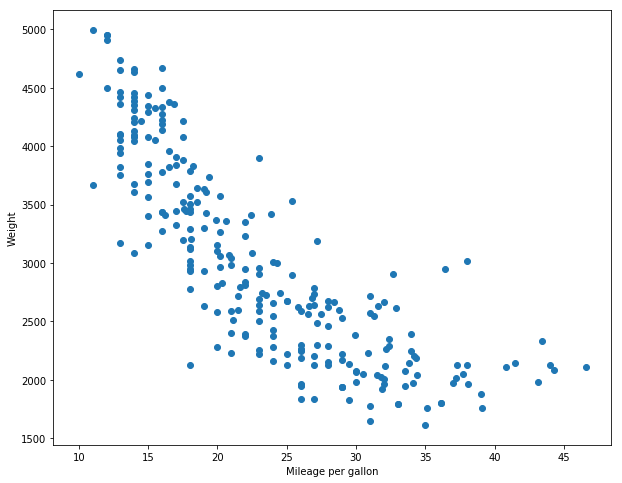

In [13]:
plt.figure(figsize=(10, 8))

plt.scatter(data['mpg'], data['weightlbs'])

plt.xlabel("Mileage per gallon")
plt.ylabel("Weight")

### KMeans Clustering
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [14]:
from sklearn.cluster import KMeans

#### Plot the sum of squared distances from cluster center to number of clusters

inertia_ : 
Sum of squared distances of samples to their closest cluster center.

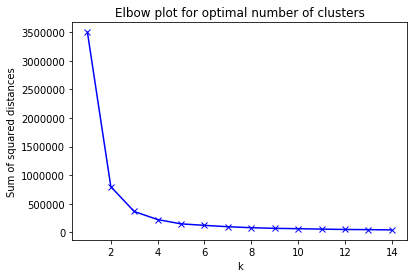

In [15]:
sum_of_squared_distances = []

K = range(1,15)

for k in K:
    k_means = KMeans(n_clusters=k)
    k_means = k_means.fit(data_x)

    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')

plt.title('Elbow plot for optimal number of clusters')
plt.show()

In [16]:
k_means = KMeans(n_clusters=3)
k_means = k_means.fit(data_x)

In [17]:
from sklearn.metrics import silhouette_score

score = silhouette_score (data_x, k_means.labels_)

print("Score = ", score)

Score =  0.6323149311159748


In [18]:
from sklearn.metrics import homogeneity_score

hmg_score = homogeneity_score(label_y, k_means.labels_)

print("Homogeneity Score = ", hmg_score)

Homogeneity Score =  0.31550036277564175


#### Finding v measure score

In [19]:
from sklearn.metrics import v_measure_score

vm_score = v_measure_score(label_y, k_means.labels_)

print("V Measure Score = ", vm_score)

V Measure Score =  0.3003375614022765


#### Finding completeness score

In [20]:
from sklearn.metrics import completeness_score

comp_score = completeness_score(label_y, k_means.labels_)

print("Completeness Score = ", comp_score)

Completeness Score =  0.28656536273532296


#### Finding adjusted-rand score

In [21]:
from sklearn.metrics import adjusted_rand_score

adj_r_score = adjusted_rand_score(label_y, k_means.labels_)

print("Adjusted_rand Score = ", adj_r_score)

Adjusted_rand Score =  0.11281925794858025


#### Finding adjusted mutual info score

In [22]:
from sklearn.metrics import adjusted_mutual_info_score

adj_mutual = adjusted_mutual_info_score(label_y, k_means.labels_, average_method='arithmetic')

print("Adjusted mutual Score = ", adj_mutual)

Adjusted mutual Score =  0.29459818425329665
